# Physics 404/604

## Computational Physics (Spring 2019)

## BPB-250, Mon./Wed. 1:00-2:15 pm

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |



# How to solve equations numerically?

How to find the solution of 2*sin(x)=x ?

or more generally, find the solution of f(x)=0

Most important thing: plot f(x) first.

## 1 Trial-and-Error Roots via Bisection
At x1, the function is positive (negative); at x2, the function is negative(positive); the solution has to be within [x1,x2]; search the value at (x1+x2)/2; if it is positive(negative), then (x1+x2)/2 is the new x1, otherwise it is x2....

In [1]:
## Always a good idea to draw the function first
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2.*np.sin(x)-x

t = np.arange(0.0, 3.0, 0.01)
s = f(t)
plt.plot(t, s)
s2 = np.zeros(len(t))
plt.plot(t,s2)
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
def bisection(xmin,xmax, Nmax, eps,f):
    for i in range(0,Nmax):
        x=(xmin+xmax)/2.
        if(f(xmin)*f(x)>0):
            xmin = x
            # add one line here
        else:
            xmax = x
            # add another line here
        if(abs(f(x))<eps):
            print("Root is at",x," after ",i," iterations, with a precision of ",abs(f(x)))
            break
    return x

In [3]:
eps = 1.e-8
a=0.5
b=3.
nmax=100
root = bisection(a,b,nmax,eps,f)


Root is at 1.8954942673444748  after  24  iterations, with a precision of  5.086029375434009e-10


## 2. Newton-Raphson Searching

Want to find x so that f(x)=0 :   
Starting with a guess at $x_{0}$, then try to correct it with $\Delta x$, hopeing that $f(x_{0}+\Delta x)=0$.
\begin{equation}
f(x=x_{0}+\Delta x)\simeq f(x_{0})+f'(x_{0})\Delta x=0
\end{equation}
So that
\begin{equation}
\Delta x=-\frac{f(x_{0})}{f'(x_{0})}
\end{equation}
Then use $x_{0}=x_{0}+\Delta x$ to update $x_{0}$.
This repeated until it reaches a given precision. 

Newton-Raphson method requires the first derivative. You can use either analytical solution or numerical derivative we talked about to calculate it (normally forward difference or central difference is sufficient). 

In [4]:
def newtonraphson(x0,dx, Nmax, eps,f):
    for i in range(0,Nmax):
        df = (f(x0+dx/2)-f(x0-dx/2))/dx
        x0 = x0 - f(x0)/df
        # add one line here to update x0
        if(abs(f(x0))<eps):
            print("Root is at",x0," after ",i," iterations, with a precision of ",abs(f(x0)))
            break
    return x0

In [5]:
eps = 1.e-8
dx=1.e-6
a=3.
nmax=100
root = newtonraphson(a,dx,nmax,eps,f)

Root is at 1.8954942670339812  after  4  iterations, with a precision of  4.440892098500626e-16


In [6]:
# However, if the initial guess is on the other side of the slope, it will get a different result
eps = 1.e-8
dx=1.e-6
a=0.
nmax=100
root = newtonraphson(a,dx,nmax,eps,f)

Root is at 0.0  after  0  iterations, with a precision of  0.0


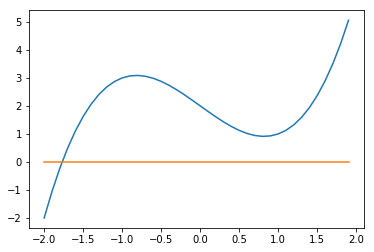

In [7]:
# it can even fail, entering infinity loop, for example x^3-2x+2
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x*x*x-2*x+2

t = np.arange(-2., 2.0, 0.1)
s = f(t)
plt.plot(t, s)
s2 = np.zeros(len(t))
plt.plot(t,s2)
plt.show()

In [8]:
def newtonraphson2(x0,dx, Nmax, eps,f):
    for i in range(0,Nmax):
        df = (f(x0+dx/2)-f(x0-dx/2))/dx
        x0 = x0-f(x0)/df
        print(x0)
    return x0

eps = 1.e-8
dx=1.e-6
a=0.
nmax=100
root = newtonraphson2(a,dx,nmax,eps,f)

0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.9999999999712443
1.397779669787269e-10
0.99999999997124

## 3. Newton-Raphson with Backtracking

If the code enters such an infinite loop, we need to restart the search with a different guess. 

If the new guess $x_{0}+\Delta x$ leads to an increase in the magnitude of the function, $|f(x_{0}+\Delta x)|^2>|f(x_{0})|^2$, we can backtrack somewhat and try a smaller guess, say $x_{0}+1/2 \Delta x$. If the magnitude still increases, we try $x_{0}+1/4 \Delta x$.

In [9]:
def newtonraphsonbacktracking(x0,dx,Nmax, eps,f):
    for i in range(0,Nmax):        
        df = (f(x0+dx/2)-f(x0-dx/2))/dx
        dxt = -f(x0)/df
        while ( ): # please finish the statement in while
              dxt=dxt/2.
        x0 = x0+dxt
        print(x0,dxt,f(x0),df)
        if(abs(f(x0))<eps):
              print("Root is at",x0," after ",i," iterations, with a precision of ",abs(f(x0)))
              break
    return x0

In [10]:
# it can even fail, entering infinity loop
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x*x*x-2*x+2

eps = 1.e-8
dx=1.e-6
a=0.
nmax=100
root = newtonraphsonbacktracking(a,dx,nmax,eps,f)

0.9999999999712443 0.9999999999712443 0.9999999999712443 -2.0000000000575113
1.397779669787269e-10 -0.9999999998314664 1.999999999720444 1.000000000139778
0.9999999999712443 0.9999999998314664 0.9999999999712443 -2.0000000000575113
1.397779669787269e-10 -0.9999999998314664 1.999999999720444 1.000000000139778
0.9999999999712443 0.9999999998314664 0.9999999999712443 -2.0000000000575113
1.397779669787269e-10 -0.9999999998314664 1.999999999720444 1.000000000139778
0.9999999999712443 0.9999999998314664 0.9999999999712443 -2.0000000000575113
1.397779669787269e-10 -0.9999999998314664 1.999999999720444 1.000000000139778
0.9999999999712443 0.9999999998314664 0.9999999999712443 -2.0000000000575113
1.397779669787269e-10 -0.9999999998314664 1.999999999720444 1.000000000139778
0.9999999999712443 0.9999999998314664 0.9999999999712443 -2.0000000000575113
1.397779669787269e-10 -0.9999999998314664 1.999999999720444 1.000000000139778
0.9999999999712443 0.9999999998314664 0.9999999999712443 -2.0000000000

## Newton-Raphson for equations
Find the solution for  
\begin{eqnarray}
x_{1}^2+x_{1}x_{2}=10\\
x_{2}+3x_{1}x_{2}^2=57
\end{eqnarray}

## Two masses on a string problem:

The problem is from the textbook "COMPUTATIONAL PHYSICS", 3rd Ed, by RH Landau, MJ Paez, and CC Bordeianu

Very hard to solve analytically.

Write down the equations, and we have 9 variables (treat sin, cos as variables), and 9 nonlinear equations.

\begin{equation}
f_{i}(x_{1},x_{2},...,x_{N})=0, \qquad i=1,2,....,N
\end{equation}

\begin{equation}
f(y)=\left[ \begin{array}{c} f_{1}(\bf{y}) \\ f_{2}(\bf{y}) \\ f_{3}(\bf{y}) \\ f_{4}(\bf{y}) \\ f_{5}(\bf{y}) \\ f_{6}(\bf{y}) \\ f_{7}(\bf{y}) \\ f_{8}(\bf{y}) \\ f_{9}(\bf{y}) \end{array}\right] = \left[ \begin{array}{c} 3x_{4}+4 x_{5} +4 x_{6} - 8 \\ 3 x_{1}+4 x_{2} -4 x_{3} \\ x_{7}x_{1} - x_{8} x_{2} -10 \\ x_{7}x_{4} - x_{8} x_{5} \\ x_{8}x_{2} + x_{9}x_{3} -20 \\ x_{8}x_{5}-x_{9}x_{6} \\ x_{1}^2+x_{4}^2-1 \\ x_{2}^2+x_{5}^2-1 \\ x_{3}^2+x_{6}^2-1 \end{array}\right] =0 
\end{equation}

Make a guess ($x_{1},...x_{9}$), and then correct it ($\Delta x_{1},...,\Delta x_{9}$), we have
\begin{equation}
f_{i}(x_{1}+\Delta x_{1}, x_{2}+\Delta x_{2}, ..., x_{9}+\Delta x_{9})=0 \qquad, i=1,...,9
\end{equation}
We can expand it using Taylor series
\begin{equation}
f_{i}(x_{1}+\Delta x_{1}, x_{2}+\Delta x_{2}, ..., x_{9}+\Delta x_{9})\simeq f_{i}(x_{1},...,x_{9})+\sum_{j=1}^{9}\frac{\partial f_{i}}{\partial x_{j}}\Delta x_{j}=0 \qquad i=1,...,9
\end{equation}

\begin{equation}
\left[ \begin{array}{c} f_{1}\\ f_{2}\\ \ddots \\ f_{9} \end{array}\right] + \begin{bmatrix} \partial f_{1}/\partial x_{1} & \partial f_{1}/\partial x_{2} & ... & \partial f_{1}/\partial x_{9} \\ \partial f_{2}/\partial x_{1} & \partial f_{2}/\partial x_{2} & ... & \partial f_{2}/\partial x_{9} \\ \ddots \\ \partial f_{9}/\partial x_{1} & \partial f_{9}/\partial x_{2} & ... & \partial f_{9}/\partial x_{9}\end{bmatrix}\left[ \begin{array}{c} \Delta x_{1} \\ \Delta x_{2} \\ \ddots \\ \Delta x_{9} \end{array}\right] =0 
\end{equation}

So we want to solve the matrix equation
\begin{equation}
F'\Delta {\bf{x}}=-\bf{f}
\end{equation}
Here we use bold font for a vector, the captal letter to represent a matrix

## Newton-Raphson for equations
Find the solution for  
\begin{eqnarray}
x_{1}^2+x_{1}x_{2}=10\\
x_{2}+3x_{1}x_{2}^2=57
\end{eqnarray}

In [11]:
## Always a good idea to draw the function first
import matplotlib.pyplot as plt
import numpy as np

def f1(x):
    return (10.-x*x)/x

def f2(x):
    return (-1+np.sqrt(1.+4.*3.*x*57))/6./x
## Draw graphics to roughly determine x1 and x2

In [12]:
# return several values using array
import matplotlib.pyplot as plt
import numpy as np


def F(x,f):
    f[0]=x[0]*x[0]+x[0]*x[1]-10.
    f[1]=x[1]+3.*x[0]*x[1]*x[1]-57.
    return f

x=[1.,2.]
f=[0.,0.]
F(x,f)
print(f)


[-7.0, -43.0]


In [13]:

f=[0.]       #in f is an array or np.array, the main program can notice that it has been changed within a function (it is similar to pass by pointer (C) or reference (C++))
def F2(x,f):
    f[0]=x-10.

F2(4.,f)
print(f)

f=0.             #If f is a variable, the main program won't notice that it is changed within the program
def F3(x,f):
    f=x-10.

F3(4.,f)
print(f)

[-6.0]
0.0


In [14]:
# Homework: using Newton-Raphson method to solve above equation arrays
# Hint: first you need to derive the partical derivative of the equation arrays. You can do it either 
# analytically by hand or numerically using method we learned in the last lecture.

In [15]:
def F(x):
    f = np.array([0.,0.])
    f[0]=x[0]*x[0]+x[0]*x[1]-10.
    f[1]=x[1]+3.*x[0]*x[1]*x[1]-57.
    return f
def F_jacobian(x):
    j = np.zeros([2,2])
    j[0] = [2*x[0]+x[1],x[0]]
    j[1] = [3*x[1]**2,1+8*x[0]]
    return j
    
def newtonraphson_2d(x0,dx, Nmax, eps):
    for i in range(Nmax):
        x0 = x0 - dx * np.dot(np.linalg.inv(F_jacobian(x0)), (F(x0)[:,np.newaxis])).T[0]
        if(abs(sum(F(x0)))<eps):
            print("Root is at",x0," after ",i," iterations, with a precision of ",abs(sum(F(x0))))
            break
    return x0

In [16]:
x0 =np.array([1,0])
dx = 0.1
Nmax = 1000
eps = 1e-7
newtonraphson_2d(x0,dx, Nmax, eps)

Root is at [2. 3.]  after  188  iterations, with a precision of  9.387851562792093e-08


array([2., 3.])